In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Exploring Poverty in the UK

I will be exploring poverty in the UK in relation to temporal trends, causes and comparisons with Europe. I am not hoping to prove anything in particular, I would like to be able to visualise the pre-Brexit statistics of impoverishment in the UK. 
Though we cannot compare it to post-Brexit stats, maybe one day (a few years down the line) someone will want to find the actual impact, as opposed to speculating.  

the [social metrics commision](https://socialmetricscommission.org.uk/) is an organisation working on better defining poverty in the hope of impacting future policy, and have already received government attention within the UK. They define absolute poverty as 60% of the median household income. Theoretically this value doesn't change much aside from a rise with inflation, but I will be using definitions given by [ons](https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/articles/persistentpovertyintheukandeu/2017#glossary) as this is where I obtained my data.  

There are some definitions that will be needed for this report, all of which are relative to households, or communities where incomes are largely communal:  

- Poverty: As per in the Child Poverty Act (2010), poverty is 'household income below 60 percent of median income'.  

     This release uses at-risk-of-poverty to define poverty, which is as aforementioned except the  
     'equivalised disposible income' per household is used as oppoed to household income  

    In 2017, the median household income was £27,300 making the poverty line £16,380. Unfortunately I have not  
    been able to find an at-risk-of-poverty equivalent


- Material deprivation: An individual is in severe material deprivation if they do not have the ability to  
  afford four or more of the following conditions:    

  * to not have arrears on your mortgage or rent payments, hire purchase instalments or other loan payments  
  * to afford a one-week annual holiday away from home  
  * to afford a meal with meat, chicken, fish or a vegetarian equivalent every other day  
  * to be able to face unexpected financial expenses  
  * to afford a telephone or mobile phone  
  * to afford a colour television  
  * to afford a washing machine  
  * to afford a car  
  * to afford to keep the home adequately warm  
  
  Material deprovation tends to indicate a long period of poverty and is  
  often linked to mental health issues (by either cause or effect)    
  
  
- Persistent poverty: An individual is in persistent poverty if they are in poverty for the current  
  year as well as two of the past three years.    
  
  
- In this analysis, Europe is defined as EU28 and other select countries: (Norway, Turkey, Serbia and North Macedonia) who are not members of the EU. Slovakia’s data for persistent poverty is unavailable.

The median household income in the UK was sourced from the [Office for National Statisitics](https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/bulletins/householddisposableincomeandinequality/financialyearending2017). I have used datasets from the [Office for National Statisitics](https://www.ons.gov.uk), and [Eurostat](https://ec.europa.eu/eurostat). 

## Material Deprivation and Poverty (UK 2017)

### Percentage of individuals who meet certain material deprivation items

I will begin with statistics regarding poverty and material deprivation in the UK.  

The following data frame shows the percent amount of people in the UK that meet certain material deprivation items, regardless of poverty status. As per the definition above, living in material deprivation is only classed as having 4 or more of these items.


In [2]:
# table 11: Percentage of individuals who meet certain material deprivation items
df = pd.read_excel('CW dataset - Persistent Poverty in the UK and EU, 2017.xls', 
                   sheet_name='Table 11', 
                   header=1, 
                   names=["Deprivation Items", "UK Percentage"], 
                   index_col="Deprivation Items", 
                   usecols="A:B", 
                   skipfooter=5
                  ) 

# set existing index as categorical dtype
pd.CategoricalIndex(df)

# change decimal to percentage value, without the symbol
df['UK Percentage'] = (df['UK Percentage']*100).astype('float').round(1)

# df_vis holds an easily human readable database
df_vis = df.copy()
df_vis['UK Percentage'] = (df_vis['UK Percentage']).astype(str) + '%'

df_vis

,UK Percentage
Deprivation Items,
Cannot face unexpected expenses,32.9%
Cannot afford one week annual holiday,23.7%
"Arrears on Mortgage, Rental Payments, Ulitity bills, or puchase installments",8.0%
Cannot afford to keep home adequately warm,5.9%
Do not have a car,5.8%
Cannot afford a meal with meat or vegetarian equilvalent every second day,5.1%


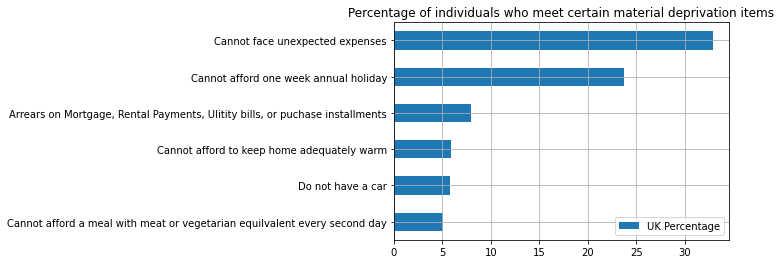

In [3]:
ax = df.plot.barh(title="Percentage of individuals who meet certain material deprivation items", grid=True)
ax.set_ylabel("")
ax.invert_yaxis()

32.9% of UK residents being unable to face unexpected expenses shows a surprising lack of financial stability for a large amount of the population. 5.1% being unable to afford a car seems less surprising. Being unable to pay arrears on a Mortgage seems like a strange material deprivation item, as having a mortgage is a luxury in the first place. 

I used a horizontal bar here to account for the long category names.

### Rate of material deprivation by poverty group

The following data frame separates the population into 3 status: persistent poverty, poverty and not poverty. The pie charts compare the rates of material deprivation against persistent material deprivation by poverty group.  

For clarity, those considered in persistent material deprivation are also considered to be in material deprivation.


In [4]:
# sheet 10 (UK Material deprivation and persistent material deprivation by poverty status, 2017)
df = pd.read_excel('CW dataset - Persistent Poverty in the UK and EU, 2017.xls', 
                   sheet_name='Table 10', 
                   header=2, 
                   names=["Poverty Status", "Material Deprivation", "Persistent Material Deprivation"], 
                   index_col="Poverty Status", 
                   usecols="A:C", 
                   skipfooter=6
                  ) 

pd.CategoricalIndex(df)

# edit values to aid future visualisations (as in percentiles)
df['Material Deprivation'] = (df['Material Deprivation']*100).astype('float').round(1)
df['Persistent Material Deprivation'] = (df['Persistent Material Deprivation']*100).astype('float').round(1)

# df_vis
df_vis = df.copy()
df_vis['Material Deprivation'] = (df_vis['Material Deprivation']).astype(str) + '%'
df_vis['Persistent Material Deprivation'] = (df_vis['Persistent Material Deprivation']).astype(str) + '%'

df_vis

,Material Deprivation,Persistent Material Deprivation
Poverty Status,,
Overall population,4.1%,2.1%
Not in Poverty,2.4%,1.0%
Poverty,13.2%,7.3%
Persistent Poverty,18.5%,10.4%


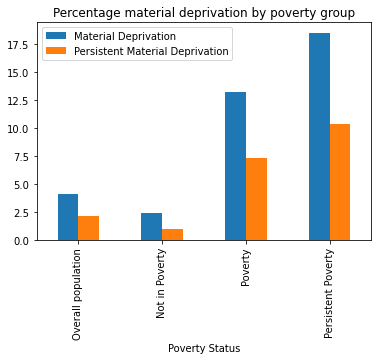

In [5]:
ax = df.plot(kind="bar", grid = False, title="Percentage material deprivation by poverty group")

We can see a clear correlation between poverty and material deprivation. 18.5% of those in persistent poverty were in material deprivation and 10.4% were in persistent material deprivation.  

This visualisation is to show the trend, meaning I don't need a grid and the values are sorted by poverty status

These charts show the deprivation status amongst those materially deprived, by poverty group 



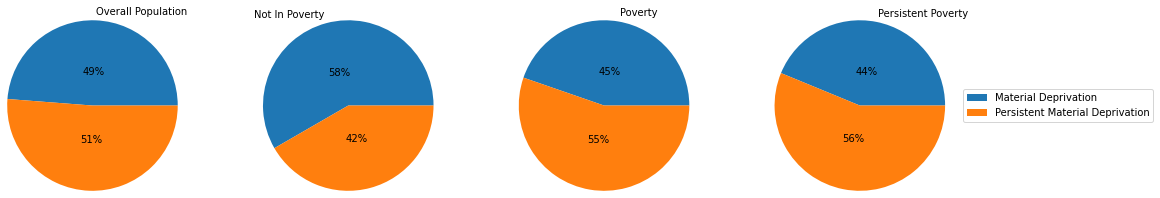

In [6]:
# make series' for pie charts
md = df['Material Deprivation']
pmd = df['Persistent Material Deprivation']

# due to the cumulative nature of the data, I have to subtract the pmd from the md values to compare severity
s1 = [md["Overall population"]-pmd["Overall population"], pmd["Overall population"]]
s2 = [md["Not in Poverty"]-pmd["Not in Poverty"], pmd["Not in Poverty"]]
s3 = [md["Poverty"]-pmd["Poverty"], pmd["Poverty"]]
s4 = [md["Persistent Poverty"]-pmd["Persistent Poverty"], pmd["Persistent Poverty"]]

plt.subplot(1, 7, 1)
plt.pie(s1, radius=5, labels = ["Overall Population", ""], autopct='%1.0f%%', pctdistance=0.4)
plt.subplot(1, 7, 3)
plt.pie(s2, radius=5, labels = ["Not In Poverty", ""], autopct='%1.0f%%', pctdistance=0.4)
plt.subplot(1, 7, 5)
plt.pie(s3, radius=5, labels = ["Poverty", ""], autopct='%1.0f%%', pctdistance=0.4)
plt.subplot(1, 7, 7)
plt.pie(s4, radius=5, labels = ["Persistent Poverty", ""], autopct='%1.0f%%', pctdistance=0.4)

plt.subplots_adjust(left  = 0.125, bottom = 0.1, right = 2, top = 0.9, wspace=2, hspace=0.2)
plt.legend(df, loc="right", bbox_to_anchor=(7, 0, 0.5, 1))

print("These charts show the deprivation status amongst those materially deprived, by poverty group \n")

Considering that these only show the materially deprived, we can see that deprivation for elongated periods is much more common amongst impoverished individuals. On average, approximately half of overall material deprivation is persistent.  

In conclusion, it seems reasonable to correlate severity of poverty with severity of with material deprivation.  

Pie charts are only useful for showing percentile comparisons, so are used here

## Poverty over time (UK 2008-2017)

###   Entry and exit rates into poverty   

Here we will be observing the entry and exit rates into poverty over time. Is should be noted that entry rates into poverty are based on the entire population, where exit rates are based on the population living in poverty, meaning the scale is different and we should not compare the actual values but rather the gradients or trends. 

In [7]:
# Table 4. UK Entry and exit rates into poverty, 2008 - 2017
df = pd.read_excel('CW dataset - Persistent Poverty in the UK and EU, 2017.xls', 
                   sheet_name='Table 4', 
                   header=1, 
                   usecols="A:C", 
                   names=["Year", "Entry", "Exit"], 
                   index_col="Year", 
                   skipfooter=6
                  ) 

df.index = pd.to_datetime(df.index, format='%Y').year
df['Entry'] = (df['Entry']).astype('float').round(1)
df['Exit'] = (df['Exit']).astype('float').round(1)


# df_vis
df_vis = df.copy()
df_vis['Entry'] = (df_vis['Entry']).astype(str) + '%'
df_vis['Exit'] = (df_vis['Exit']).astype(str) + '%'

df

,Entry,Exit
Year,,
2008,8.2,39.6
2009,8.8,47.0
2010,8.8,46.1
2011,6.4,52.2
2012,9.0,50.4
2013,7.6,47.8
2014,6.5,49.7
2015,7.4,49.5
2016,6.4,44.6


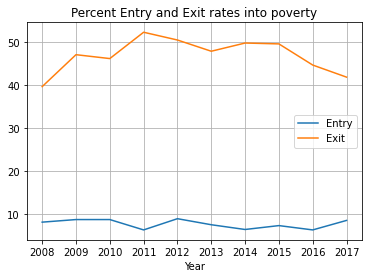

In [8]:
ax = df.plot(kind="line", grid=True, title="Percent Entry and Exit rates into poverty", xticks=df.index)
print()

We can see that the entry rate into poverty is more or less stable between 2008 and 2017. The exit rate was increasing between 2008 and 2011 and stayed approximately stable until 2015, where it started dropping.  

In 2008 the exit rate was 39.6% and in 2017 it was 41.8%, which are not hugely dissimilar but looking at the years in between we can see that people within poverty are more likey to be experiencing it persistently, or are becoming less likely to exit poverty.  

The entry rates between 2011 and 2017 were 8.2% and 8.6% respectively, and did not change significantly during this time.  
In 2011 both the entry and exit rates show that poverty rates were trending negatively for this year. 


### Rates of Material deprivation

Viewing the rates of material deprivation over the same time period

In [9]:
# Table 9. UK Material deprivation and persistent material deprivation rates, 2008-2017

df = pd.read_excel('CW dataset - Persistent Poverty in the UK and EU, 2017.xls', 
                   sheet_name='Table 9', 
                   header=1, 
                   usecols="A:C", 
                   names=["Year", "Material Deprivation", "Persistent Material Deprivation"], 
                   index_col="Year", 
                   skiprows=0, 
                   skipfooter=5
                  ) 

# datetime index
df.index = pd.to_datetime(df.index, format='%Y').year

df['Material Deprivation'] = (df['Material Deprivation']).astype('float').round(1)
df['Persistent Material Deprivation'] = (df['Persistent Material Deprivation']).astype('float').round(1)


# df_vis holds this data frames with percentile values to aid readability
df_vis = df.copy()
df_vis['Material Deprivation'] = (df_vis['Material Deprivation']).astype(str) + '%'
df_vis['Persistent Material Deprivation'] = (df_vis['Persistent Material Deprivation']).astype(str) + '%'


display(df_vis)

,Material Deprivation,Persistent Material Deprivation
Year,,
2008,4.5%,0.6%
2009,3.3%,1.1%
2010,4.8%,0.9%
2011,5.1%,1.5%
2012,7.8%,1.8%
2013,8.3%,2.6%
2014,7.4%,3.6%
2015,6.1%,4.5%
2016,5.2%,2.6%


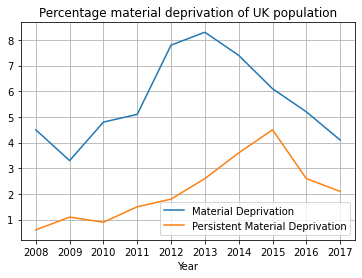

In [10]:
ax = df.plot(kind="line", grid=True, xticks=df.index, title="Percentage material deprivation of UK population")

Material deprivation rates have been steadily decreasing between 2013 and 2017 (around 1% each year). Persistent material deprivation rates started falling rapidly at around 2015, after peaking at 4.5%. Studying this table and the above, it seems logical to expect deprivation to rise after 2015 (in accordance with the lower rates of exit from poverty). Since this did not happen we can assume that though there does seem to be some kind of correlation, a direct and purely financial link is maybe not the case. 

It should be noted that the ranges of the axis are different in the 2 graphs above, and there are many factors to consider regarding poverty and deprivation, such as policy or temporal events.

## European Poverty

## UK against the EU average (2008 - 2017)

The following is a comparison of poverty rates between the UK and the EU average, for poverty and persistent poverty

In [11]:
# Table 2. UK and EU average persistent and poverty rates, 2008-2017, percentage total population

df = pd.read_excel('CW dataset - Persistent Poverty in the UK and EU, 2017.xls', 
                   sheet_name='Table 2', 
                   header= 2,  
                   usecols="A:C, E:F", 
                   names=["Year", 
                          "Overall poverty - UK", "Overall poverty - EU", 
                          "Persistent poverty - UK", "Persistent poverty - EU"
                         ], 
                   index_col="Year", 
                   skipfooter=5
                    ) 

# datetime index
df.index = pd.to_datetime(df.index, format='%Y').year

# df_vis
df_vis = df.copy()
df_vis['Overall poverty - UK'] = (df_vis['Overall poverty - UK']).astype(str) + '%'
df_vis['Overall poverty - EU'] = (df_vis['Overall poverty - EU']).astype(str) + '%'
df_vis['Persistent poverty - UK'] = (df_vis['Persistent poverty - UK']).astype(str) + '%'
df_vis['Persistent poverty - EU'] = (df_vis['Persistent poverty - EU']).astype(str) + '%'

df_vis

,Overall poverty - UK,Overall poverty - EU,Persistent poverty - UK,Persistent poverty - EU
Year,,,,
2008,18.7%,16.6%,8.5%,8.7%
2009,17.3%,16.4%,8.0%,9.2%
2010,17.1%,16.5%,7.4%,10.0%
2011,16.2%,16.9%,6.9%,9.8%
2012,16.0%,16.8%,8.6%,10.3%
2013,15.9%,16.7%,7.8%,10.0%
2014,16.8%,17.2%,6.5%,10.3%
2015,16.6%,17.3%,7.3%,10.9%
2016,15.9%,17.3%,9.4%,11.0%


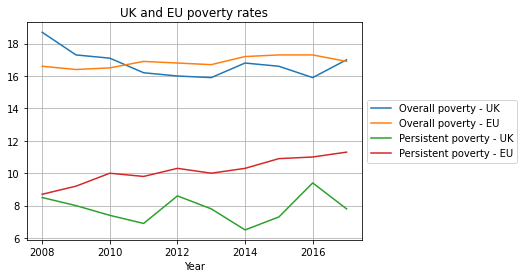

In [12]:
ax = df.plot(kind = "line", grid=True, title="UK and EU poverty rates")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In 2008 the UK and EU average rates of persistent poverty were approximately equal, at 8.5% and 8.7% respectively. Over time the EU average seems to have steadily risen to 11.3%, where the UK rate has fluctuated steadily around 8% (+/- 1.5%), with a trough in 2014.  

The overall poverty rates in the UK was 18.7%, and the EU average was much lower, at 16.6%, and jsut like to persistent poverty rates, the EU average seems to have remained more or less steady, being 16.9% in 2017. The uk rates, once again, seem to have fluctuated over time and end at 17%.  

Hypothetically, the fluctuations between the rates for 1 country compared to the smoothness of the EU average makes sense considering that EU countries have influence over each other and are averaged. In the following graph we will compare different countries to each other and if we had this data over time we would likey also see fluctuations in individual rates over time. 

By plotting this data (due to the large range of points) we can try to determine a correlation between poverty and persistent poverty

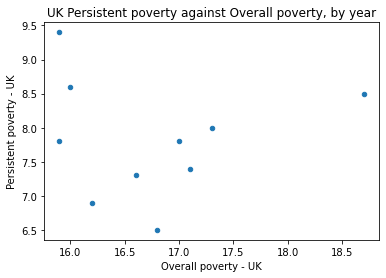

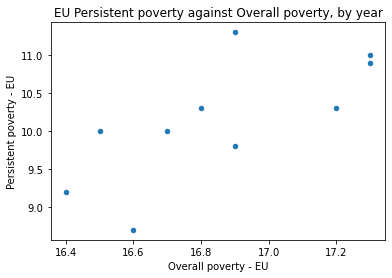

In [13]:
ax = df.plot(kind="scatter", 
             x='Overall poverty - UK', 
             y='Persistent poverty - UK', 
             title="UK Persistent poverty against Overall poverty, by year", 
            )

ax2 = df.plot(kind="scatter", 
             x='Overall poverty - EU', 
             y='Persistent poverty - EU', 
             title="EU Persistent poverty against Overall poverty, by year", 
            )

Regarding the data above, a correlation seems inevitable, but is apparantly not obvious. It should be noted that the UK's erratic changes in poverty rate may cause us to not see a clear correlation, where Europe's smoother curve makes a trend more visible

### Poverty rates across the EU and other select countries, 2017

Here we will be checking the poverty rates in 2017 between European countries (listed in the introduction). Since Slovakia's Persistent Poverty Percentage is unavailable, Slovakia's data will be removed form this comparison to avoid skewing. Apart from Slovakia, several other countries are completely missing from this dataset, such as Kosovo, Switzerland and Ukraine.  

ONS claims that Countries tend to have similar poverty rates as their neighbours. As there will be no point visualising each individual country, I will be grouping them by region. After searching a few different ways to do this, I decided to settle with the lists in the [CIA world factbook](https://www.cia.gov/library/publications/the-world-factbook/).

In [14]:
# Table 1. Poverty rates across the EU and other select countries, 2017
df = pd.read_excel('CW dataset - Persistent Poverty in the UK and EU, 2017.xls', 
                   sheet_name='Table 1', 
                   header=1, 
                   usecols="A:C", 
                   names=["Country", "Persistent poverty", "Overall poverty"], 
                   index_col="Country", 
                   skipfooter=5
                  ) 

# set existing index as categorical dtype
pd.CategoricalIndex(df)

# remove slovakia
df.drop(labels="Slovakia", axis=0, inplace=True)

df['Persistent poverty'] = (df['Persistent poverty']).astype('float').round(1)
df['Overall poverty'] = (df['Overall poverty']).astype('float').round(1)

# splitting into regions
df_region = pd.DataFrame()   
df_region["Central"] = df.loc[['Germany', 'Poland', 'Austria', 'Czechia', 'Slovenia', 'Hungary']].mean().round(2)
df_region["West"] = df.loc[['United Kingdom', 'Ireland', 'France', 'Belgium', 'Netherlands', 'Italy', 'Malta', 'Luxembourg']].mean().round(2)
df_region["South West"] = df.loc[['Spain', 'Portugal']].mean().round(2)
df_region["North"] = df.loc[['Norway', 'Sweden', 'Finland', 'Denmark']].mean().round(2)
df_region["East"] = df.loc[['Estonia', 'Latvia', 'Lithuania']].mean().round(2)
df_region["South East"] = df.loc[['Croatia', 'North Macedonia', 'Serbia', 'Bulgaria', 'Turkey', "Romania"]].mean().round(2)
df_region["South"] = df.loc[['Greece', 'Cyprus']].mean().round(2)

# df_region_vis
df_region_vis = df_region.copy()
df_region_vis["Central"] = (df_region_vis["Central"]).astype(str) + '%'
df_region_vis["West"] = (df_region_vis["West"]).astype(str) + '%'
df_region_vis["South West"] = (df_region_vis["South West"]).astype(str) + '%'
df_region_vis["North"] = (df_region_vis["North"]).astype(str) + '%'
df_region_vis["East"] = (df_region_vis["East"]).astype(str) + '%'
df_region_vis["South East"] = (df_region_vis["South East"]).astype(str) + '%'
df_region_vis["South"] = (df_region_vis["South"]).astype(str) + '%'



display(df)
display(df_region_vis)

,Persistent poverty,Overall poverty
Country,,
Austria,9.1,14.4
Belgium,10.8,15.9
Bulgaria,15.9,23.4
Croatia,15.2,20.0
Cyprus,6.6,15.7
Czechia,4.4,9.1
Denmark,5.5,12.4
Estonia,16.1,21.0
Finland,6.0,11.5


,Central,West,South West,North,East,South East,South
Persistent poverty,8.03%,9.52%,14.45%,5.95%,15.7%,16.45%,10.3%
Overall poverty,13.55%,16.34%,19.95%,13.0%,22.0%,22.85%,17.95%


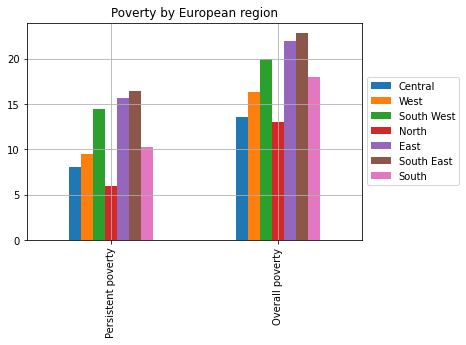

In [15]:
ax = df_region.plot(kind = "bar", grid=True, title="Poverty by European region")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

As we can see, the most poverty stricken region of Europe is the South West, consisting of only Greece and Cyprus. The least poverty stricken region is the North: Norway, Sweden, Finland and Denmark. There was no data for Iceland, which would also have been grouped into this region. As it stands, Iceland continually has an incredibly low rate of poverty, with [borgenproject](https://borgenproject.org/) claiming the rate to have been 6.5% in 2017. 

## Conclusion

Key findings:

- Approximately 1/3 of people in the UK, across poverty groups, cannot face unexpected expenses. 

- Material deprivation affects peope from all poverty classes.  

- Entry rates into poverty have been steady between 2008 and 2017, but the exit rates have started declining, meaning that poverty is increasing in the UK

- Material deprivation and persistent material deprivation rates in the UK have been dropping over recent years

- UK poverty rates in 2017 are around the European average, and were much higher in 2008

- Persistent poverty rates are currently much lower than the european average, and were approximately equal in 2008

- Poverty and material deprivation seem to correlate, but due to the amount of factors to consider we cannot mathematically relate these 2 values to one another based on each other alone

- northern europe has very low rates of poverty across the board, in contrast to southern europe which has high rates.

Process Evaluation:  

- Using the dataset I had, I believe I did a good job with my decisions, and ordering when structuring this notebook. 

- If I was more comfortble with combining tables then some cross-dataset visualisations could have come from my data, leading to more hypotheses. 

what did you learn?

- I've never made a notebook before and I've become fairly comfortable with it. 

- Different types of visualisations work better for different datasets, however, sometimes using them for non-standard reasons can be beneficial. 

what could you have improved?
- Collating several datasets would make for a much larger project, but would make the findings more trustable. 

- If possible, I would have liked to make a scatterplot of all European countries, coloured by region, to better be able to interpret any ourliers amongst the "geographically close" regions. 

- Some dataframes could have been tidied further, but I found them to be useable as they were. 
